## TP1

Para las imágenes que serán proporcionadas de Tito se pide:
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las
variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de
iluminación

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

### Cordenadas cromaticas

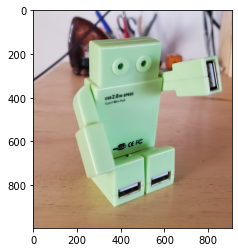

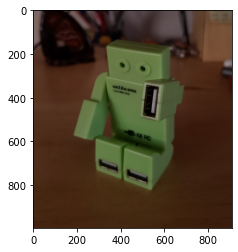

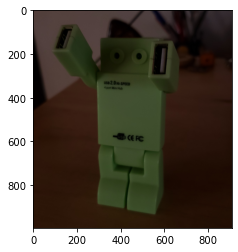

In [109]:
img_crom1 = cv.imread('CoordCrom_1.png')
plt.imshow(cv.cvtColor(img_crom1, cv.COLOR_BGR2RGB))
plt.show()

img_crom2 = cv.imread('CoordCrom_2.png')
plt.imshow(cv.cvtColor(img_crom2, cv.COLOR_BGR2RGB))
plt.show()

img_crom3 = cv.imread('CoordCrom_3.png')
plt.imshow(cv.cvtColor(img_crom3, cv.COLOR_BGR2RGB))
plt.show()

In [148]:
def chromaticCordinates(img):
    out = np.zeros(img.shape)
    img_sum = img.sum(axis=2)
    np.divide(img,img_sum[:, :, None], out=out, where=img_sum[:, :, None]!=0)
    return (out*255).astype(np.uint8)

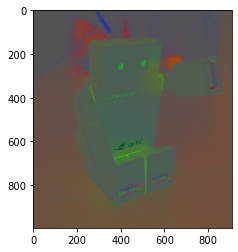

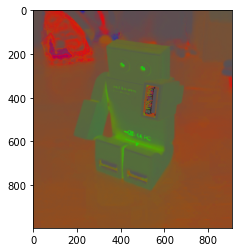

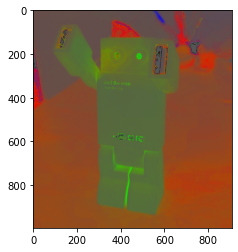

In [149]:
#coordenadas cromaticas
plt.imshow(cv.cvtColor(chromaticCordinates(img_crom1), cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(chromaticCordinates(img_crom2), cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(chromaticCordinates(img_crom3), cv.COLOR_BGR2RGB))
plt.show()

### White Patch

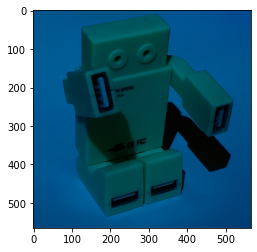

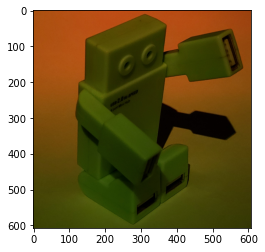

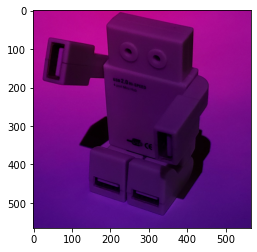

In [176]:
img_wp1 = cv.imread('WP_B.png')
plt.imshow(cv.cvtColor(img_wp1, cv.COLOR_BGR2RGB))
plt.show()

img_wp2 = cv.imread('WP_O.png')
plt.imshow(cv.cvtColor(img_wp2, cv.COLOR_BGR2RGB))
plt.show()

img_wp3 = cv.imread('WP_R.png')
plt.imshow(cv.cvtColor(img_wp3, cv.COLOR_BGR2RGB))
plt.show()

In [166]:
def whitePatch(img, percentil=None):
    img_new = np.zeros(img.shape)
    
    if percentil:
        max_ch = np.percentile(img, percentil, axis=(0,1))  
        i = 0
        for max_value in max_ch: 
            img_new[:,:,i] = img[:,:,i] * 255.0/max_value
            i += 1
        np.clip(img_new, 0, 255, out=img_new)
        return img_new.astype(np.uint8)
    else:
        max_ch = img.max(axis=(0,1))
        i = 0
        for max_value in max_ch: 
            img_new[:,:,i] = img[:,:,i] * 255.0/max_value
            i += 1
        np.clip(img_new, 0, 255, out=img_new)
        return img_new.astype(np.uint8)

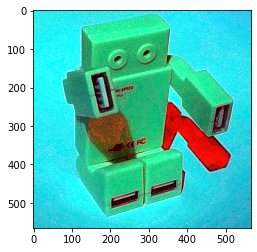

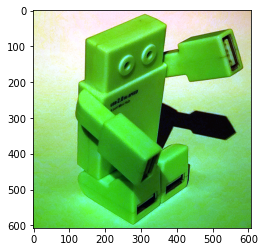

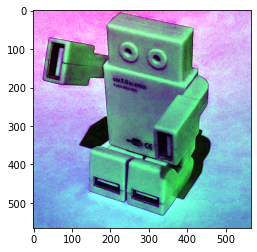

In [175]:
plt.imshow(cv.cvtColor(whitePatch(img_wp1, percentil=95), cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(whitePatch(img_wp2, percentil=95), cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(whitePatch(img_wp3, percentil=95), cv.COLOR_BGR2RGB))
plt.show()

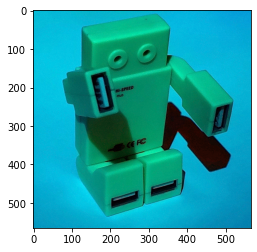

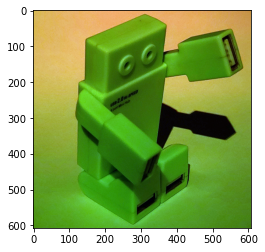

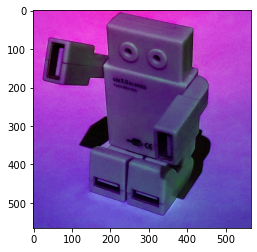

In [168]:
plt.imshow(cv.cvtColor(whitePatch(img_wp1), cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(whitePatch(img_wp2), cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(whitePatch(img_wp3), cv.COLOR_BGR2RGB))
plt.show()